## ANOVA

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("data/anova_sample.txt", sep="\t")

In [7]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [8]:
df_melt = pd.melt(df.reset_index(), id_vars = ["index"], value_vars = ["A", "B", "C", "D"])

In [9]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

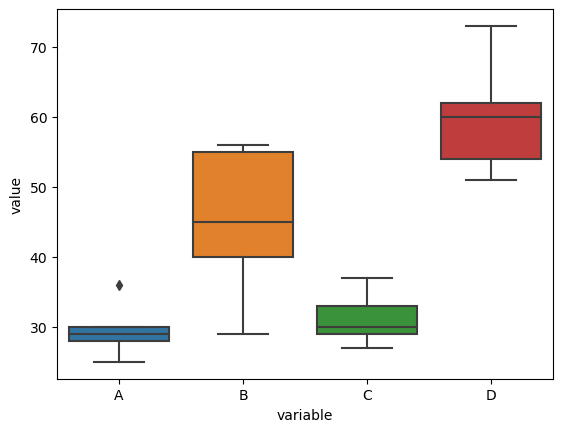

In [11]:
ax = sns.boxplot(x = "variable", y = "value", data = df_melt)

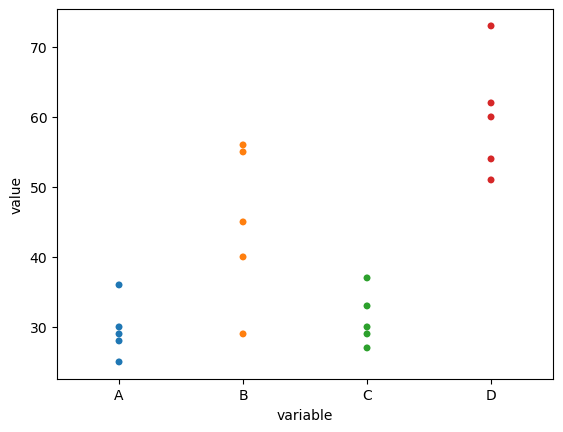

In [12]:
ax = sns.swarmplot(x = "variable", y = "value", data = df_melt)

In [13]:
import scipy.stats as stats

In [14]:
fvalue, pvalue = stats.f_oneway(df["A"], df["B"], df["C"], df["D"])

In [15]:
fvalue, pvalue

(17.492810457516338, 2.639241146210922e-05)

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
model = ols("value ~ C(variable)", data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN
